In [25]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

In [26]:
df_inp = pd.read_csv('logisticX.csv',header=None)
df_op = pd.read_csv('logisticY.csv',header=None)

In [27]:
np_X = df_inp.to_numpy()
np_Y = df_op.to_numpy()
print(df_inp)
print(df_op)

         0       1
0   3.8915  4.2105
1   3.6898  6.6051
2   2.7763  7.5057
3   3.1137  5.7724
4   2.9251  5.4315
..     ...     ...
95  5.7629  4.6161
96  4.1817  4.0577
97  6.3065  2.4776
98  5.6043  3.3146
99  7.0567  4.7346

[100 rows x 2 columns]
    0
0   0
1   0
2   0
3   0
4   0
.. ..
95  1
96  1
97  1
98  1
99  1

[100 rows x 1 columns]


In [28]:
#print(np_X)
m = np.mean(np_X)
va = np.var(np_X)
std_dev = math.sqrt(va)
np_X = np_X -m
np_X /= std_dev
#print(np_X)
print(np.mean(np_X))
print(np.var(np_X))
#print(np_Y)

2.708944180085382e-16
1.0


In [29]:
#data pre processing 
m = np.shape(np_X)[0]
np_X =np.append(np_X, np.ones((m,1)), axis=1 )
print(np_X)
dims = np.size(np_X, 1)
print(dims)

[[-5.01572719e-01 -2.66031038e-01  1.00000000e+00]
 [-6.50502992e-01  1.50208216e+00  1.00000000e+00]
 [-1.32500872e+00  2.16706284e+00  1.00000000e+00]
 [-1.07588093e+00  8.87237149e-01  1.00000000e+00]
 [-1.21513849e+00  6.35525052e-01  1.00000000e+00]
 [-6.65196658e-01  1.38061944e+00  1.00000000e+00]
 [-1.27767887e+00 -5.59092145e-01  1.00000000e+00]
 [-5.89144015e-01  4.93978531e-01  1.00000000e+00]
 [-1.42084981e+00 -7.94633827e-01  1.00000000e+00]
 [-3.54857572e-01  1.00345740e+00  1.00000000e+00]
 [-9.13438392e-01  7.07811982e-01  1.00000000e+00]
 [-2.31169946e+00  9.29915234e-01  1.00000000e+00]
 [-6.48952404e-01  3.69193126e-01  1.00000000e+00]
 [-8.87471583e-02 -6.95396203e-01  1.00000000e+00]
 [ 1.48271273e-01  1.42314985e+00  1.00000000e+00]
 [-6.20377285e-01  2.01655798e-01  1.00000000e+00]
 [ 3.07095774e-01  8.19380471e-01  1.00000000e+00]
 [-2.77180503e-01  1.39125204e+00  1.00000000e+00]
 [ 7.72050622e-01  1.11103867e+00  1.00000000e+00]
 [-5.93352754e-01  7.36215429e-

In [30]:
def loss_func(np_X,np_Y,weight,m):
    s=0.0
    for i in range(m):
        s += -(np_Y[i]*(math.log(1/(1+np.exp(-1*(np.dot(np_X[i],weight)))))))-((1-np_Y[i])*(math.log(np.exp(-1*(np.dot(np_X[i],weight)))/(1+np.exp(-1*(np.dot(np_X[i],weight)))))))
        # the line above is just the negative of log likelihood for one data sample
    s /= 2*m
    return s
    

In [31]:
theta = np.zeros((dims,1))
print(theta)
print(math.log(2))
print(np.shape(np_X[0]))

[[0.]
 [0.]
 [0.]]
0.6931471805599453
(3,)


In [32]:
#testing loss function
print(loss_func(np_X,np_Y,theta,m))

[0.34657359]


In [33]:
def sigmoid(np_X,theta,i):
    s=0.0
    s = 1/(1+ np.exp(-1*np.dot(np.transpose(theta),np_X[i])))
    return s

In [34]:
print(sigmoid(np_X,theta,0))
print(np_Y[0]*np_X[0])

[0.5]
[-0. -0.  0.]


In [35]:
def hessian(np_X,np_Y,theta,m,dims):
    np_hess = np.zeros((dims,dims))
    for i in range(m):
        np_o = np_X[i].reshape((dims,1))
        np_hess += sigmoid(np_X,theta,i)*(1-sigmoid(np_X,theta,i))*np.dot(np_o,np.transpose(np_o))
    np_hess /= m
    return np_hess

In [36]:
print(hessian(np_X,np_Y,theta,m,dims))

[[ 0.23741551 -0.12395829  0.00884657]
 [-0.12395829  0.26258449 -0.00884657]
 [ 0.00884657 -0.00884657  0.25      ]]


In [37]:
def gradient_log(np_X,np_Y,theta,m,dims):
    np_grad = np.zeros(dims)
    for i in range(m):
        np_grad += (sigmoid(np_X,theta,i)-np_Y[i])*np_X[i]
    np_grad /= m
    return np_grad

In [38]:
def newton_meth(np_X,np_Y,theta,m,dims,epochs):
    np_loss = np.zeros((epochs+1))
    np_loss[0]= loss_func(np_X,np_Y,theta,m)
    for epoch in range(epochs):
        np_o = gradient_log(np_X,np_Y,theta,m,dims).reshape((dims,1))
        theta = theta - np.dot(np.linalg.inv(hessian(np_X,np_Y,theta,m,dims)),np_o)
        #print(np.shape(theta))
        #print(loss_func(np_X,np_Y,theta,m))
        print(theta)
        np_loss[epoch+1] = loss_func(np_X,np_Y,theta,m)
    return theta,np_loss
        

In [39]:
epochs = 15
np_loss = np.zeros((epochs+1))
theta,np_loss = newton_meth(np_X,np_Y,theta,m,dims,epochs)

[[ 0.92142433]
 [-0.89832882]
 [-0.06439426]]
[[ 1.5880951 ]
 [-1.53527136]
 [-0.01889946]]
[[ 2.16040105]
 [-2.13444254]
 [ 0.07727528]]
[[ 2.52959798]
 [-2.52901068]
 [ 0.17276936]]
[[ 2.64862549]
 [-2.65172705]
 [ 0.20987627]]
[[ 2.65796827]
 [-2.66101107]
 [ 0.21301308]]
[[ 2.65801936]
 [-2.66106075]
 [ 0.2130308 ]]
[[ 2.65801937]
 [-2.66106075]
 [ 0.2130308 ]]
[[ 2.65801937]
 [-2.66106075]
 [ 0.2130308 ]]
[[ 2.65801937]
 [-2.66106075]
 [ 0.2130308 ]]
[[ 2.65801937]
 [-2.66106075]
 [ 0.2130308 ]]
[[ 2.65801937]
 [-2.66106075]
 [ 0.2130308 ]]
[[ 2.65801937]
 [-2.66106075]
 [ 0.2130308 ]]
[[ 2.65801937]
 [-2.66106075]
 [ 0.2130308 ]]
[[ 2.65801937]
 [-2.66106075]
 [ 0.2130308 ]]


In [17]:
print(theta)

[[ 2.65801937]
 [-2.66106075]
 [ 0.2130308 ]]


In [18]:
print(epochs+1)
plt_X = np.linspace(1,(epochs+1),epochs+1)
print(plt_X)

16
[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16.]


0.11417072492236197


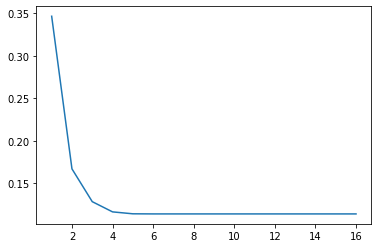

In [20]:
plt.plot(plt_X,np_loss)
print(np_loss[15])

In [21]:
# plot pre processing
np_x1 = np.linspace(-3,3,10000)
print(np_x1)
np_x2 = (-1*theta[1]*np_x1-theta[2])/theta[0]

[-3.         -2.99939994 -2.99879988 ...  2.99879988  2.99939994
  3.        ]


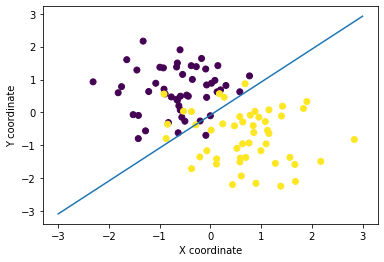

In [22]:
#Plotting classification data
plt.scatter(np_X[:,0],np_X[:,1],c=np_Y)
plt.plot(np_x1,np_x2)
plt.xlabel('X coordinate')
plt.ylabel('Y coordinate')
plt.show()